<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#FFBB55;
           font-size:20px;
           font-family:Nexa;
           letter-spacing:0.5px">
        <p style="padding: 10px;
              color:black;">
            <b>Resampling data and using autoML</b>
        </p>
</div>
<div class="alert alert-block alert-info" style="font-size:22px; font-family:arial;">
    Presented by Ibrahim Hossam
</div>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv', sep = ',', encoding = 'utf-8')
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
94337,64837.0,-2.342125,-0.691247,0.581436,-1.973589,0.327926,-0.072179,1.060103,-0.228944,-1.433256,...,-0.612532,-0.910947,0.658688,-1.032297,0.762063,-0.600204,0.453501,0.106378,180.25,0
30814,36090.0,1.131802,-0.369712,1.169786,0.836518,-1.095213,0.117761,-0.842799,0.331427,1.247031,...,-0.086921,-0.130468,0.084277,0.064857,0.109137,0.352908,0.019053,0.019830,11.50,0
104896,69276.0,-1.299973,1.469715,0.991695,1.341176,-0.734756,-0.374578,-0.034997,0.542643,0.495932,...,-0.013639,0.236494,-0.131434,0.372552,-0.057103,-0.195711,0.388508,0.274656,10.00,0
75409,56050.0,0.962553,-0.123669,0.191440,1.272528,0.014626,0.376709,0.111713,0.105032,-0.019954,...,-0.009647,-0.020531,-0.203341,-0.271273,0.656191,-0.321373,0.020455,0.019890,102.99,0
265734,162025.0,1.963913,-0.303299,-0.445809,0.348678,-0.392624,-0.284534,-0.435868,-0.037170,1.159253,...,-0.170091,-0.380701,0.378163,0.707629,-0.385248,-0.659709,0.031497,-0.019443,24.99,0


array([<Axes: ylabel='Class'>], dtype=object)

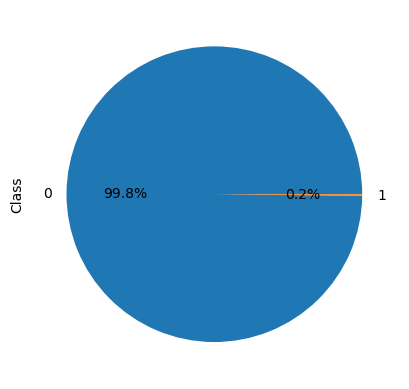

In [3]:
round(df['Class'].value_counts()/df.shape[0]*100, 2).plot.pie(autopct = "%1.1f%%", subplots = True)

In [4]:
df.drop_duplicates()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.dropna(inplace = True)

***
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#DA986B;
           font-size:24px;
           font-family:Nexa;
           letter-spacing:0.5px">
        <p style="padding: 10px;
              color:white;">
            <b>Modelling</b>
        </p>
</div>

In [7]:
x = df.drop('Class', axis = 1)
y = df['Class']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .25, random_state = 42)

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
lg = LogisticRegression()

In [11]:
lg.fit(x_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
print(lg.score(x_train, y_train))
lg.score(x_test, y_test)

0.9989841061772898


0.9987500351113733

## Oversampling

In [13]:
from imblearn.over_sampling import SMOTE

In [14]:
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

In [15]:
lg.fit(x_resampled, y_resampled)

LogisticRegression()

In [16]:
print(lg.score(x_resampled, y_resampled))
lg.score(x_test, y_test)

0.9720062281335297


0.9806185219516306

## Undersampling

In [17]:
from imblearn.under_sampling import RandomUnderSampler

In [18]:
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
x_undersampled, y_undersampled = undersampler.fit_resample(x_train, y_train)

In [19]:
lg.fit(x_undersampled, y_undersampled)

LogisticRegression()

In [20]:
print(lg.score(x_undersampled, y_undersampled))
lg.score(x_test, y_test)

0.920844327176781


0.9458161287604281

In [21]:
from xgboost import XGBClassifier

In [22]:
xgb = XGBClassifier(n_estimators = 25, max_depth =  4, learning_rate = 0.29)

In [23]:
xgb.fit(x_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.29, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=25, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [24]:
print(xgb.score(x_resampled, y_resampled))
xgb.score(x_test, y_test)

0.9907820809844953


0.9948877840510097

In [25]:
xgb.fit(x_undersampled, y_undersampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.29, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=25, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [26]:
print(xgb.score(x_undersampled, y_undersampled))
xgb.score(x_test, y_test)

1.0


0.961981405016713

***
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#F94488;
           font-size:20px;
           font-family:Nexa;
           letter-spacing:0.5px">
        <p style="padding: 10px;
              color:black;">
            <b>Auto Machine Learing</b>
        </p>
</div>
I did a small report considering the subject in the following link:

https://docs.google.com/document/d/1SFGFT8BZ7WmQFExz-EPsU2F76f9ZnX1SYfo9OMfVsvk/edit?usp=sharing

In [27]:
pip install mljar-supervised

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.1/128.1 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 8.4 MB/s eta 0:00:00
  Created wheel for mljar-supervised: filename=mljar_supervised-1.0.2-py3-none-any.whl size=163306 sha256=44c166a16dea05521aa0a58f050b7b77612a002b322b194411268bd2d364aead
  Stored in directory: /root/.cache/pip/wheels/4b/cb/0a/386e3abf36b877af0a2a4863d1d786a6d6414a343a71a04640
Successfully built mljar-supervised
Note: you may need to restart the kernel to use updated packages.


In [28]:
from supervised.automl import AutoML

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [29]:
automl = AutoML(algorithms=["Decision Tree", "Linear", "Random Forest"],
                total_time_limit=5*60)
automl.fit(x_train, y_train)

Linear algorithm was disabled.
AutoML directory: AutoML_1
The task is binary_classification with evaluation metric logloss
AutoML will use algorithms: ['Decision Tree', 'Random Forest']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 1 model


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


1_DecisionTree logloss 0.004273 trained in 30.17 seconds
* Step default_algorithms will try to check up to 1 model


/opt/conda/lib/python3.10/site-packages/shap/plots/_beeswarm.py:925: UserWarning: The figure layout has changed to tight
/opt/conda/lib/python3.10/site-packages/supervised/utils/shap.py:116: UserWarning: The figure layout has changed to tight


2_Default_RandomForest logloss 0.003109 trained in 103.86 seconds
* Step ensemble will try to check up to 1 model
Ensemble logloss 0.003109 trained in 9.45 seconds
AutoML fit time: 155.38 seconds
AutoML best model: 2_Default_RandomForest


AutoML(algorithms=['Decision Tree', 'Linear', 'Random Forest'],
       total_time_limit=300)

In [30]:
print(automl.score(x_train, y_train))
automl.score(x_test, y_test)

0.9713723929683294


0.9948035167551473

## Using pyCaret

In [31]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 62.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 77.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.2/185.2 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 62.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.7/118.7 kB 10.8 MB

In [32]:
from pycaret.classification import *

In [33]:
clf = setup(df, target="Class", train_size=0.75)

,Description,Value
0,Session id,5770
1,Target,Class
2,Target type,Binary
3,Original data shape,"(284807, 31)"
4,Transformed data shape,"(284807, 31)"
5,Transformed train set shape,"(213605, 31)"
6,Transformed test set shape,"(71202, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


In [34]:
diff_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9996,0.9802,0.7832,0.9522,0.8577,0.8575,0.8625,49.0300
catboost,CatBoost Classifier,0.9996,0.9782,0.7885,0.9536,0.8617,0.8615,0.8662,47.5860
rf,Random Forest Classifier,0.9995,0.9456,0.7749,0.9390,0.8473,0.8470,0.8519,83.1080
et,Extra Trees Classifier,0.9995,0.9442,0.7804,0.9455,0.8537,0.8535,0.8581,14.4020
lda,Linear Discriminant Analysis,0.9994,0.8982,0.7696,0.8762,0.8183,0.8181,0.8203,0.8990
lr,Logistic Regression,0.9992,0.9435,0.6393,0.8601,0.7281,0.7277,0.7384,3.0160
ada,Ada Boost Classifier,0.9992,0.9686,0.6881,0.8046,0.7393,0.7389,0.7424,24.4770
dt,Decision Tree Classifier,0.9991,0.8656,0.7317,0.7465,0.7369,0.7364,0.7375,7.1270
gbc,Gradient Boosting Classifier,0.9990,0.6895,0.5333,0.7874,0.6131,0.6127,0.6341,129.2160
ridge,Ridge Classifier,0.9989,0.0000,0.4198,0.8522,0.5566,0.5562,0.5942,0.1680


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [35]:
best_model = create_model("et")
tuned_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9993,0.8889,0.7027,0.8387,0.7647,0.7643,0.7673
1,0.9996,0.9445,0.8108,0.9677,0.8824,0.8822,0.8856
2,0.9996,0.9861,0.8649,0.9143,0.8889,0.8887,0.8890
3,0.9997,0.9584,0.8649,0.9697,0.9143,0.9141,0.9156
4,0.9996,0.9447,0.7838,1.0000,0.8788,0.8786,0.8851
5,0.9996,0.9569,0.7500,1.0000,0.8571,0.8569,0.8658
6,0.9996,0.9584,0.8378,0.9394,0.8857,0.8855,0.8870
7,0.9995,0.9578,0.7568,0.9333,0.8358,0.8356,0.8402
8,0.9993,0.9159,0.6757,0.9259,0.7813,0.7809,0.7907


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9991,0.9434,0.7568,0.7179,0.7368,0.7364,0.7366
1,0.9992,0.9878,0.8378,0.7381,0.7848,0.7844,0.7860
2,0.9993,0.9818,0.9459,0.7143,0.8140,0.8136,0.8217
3,0.9993,0.9890,0.9189,0.7556,0.8293,0.8289,0.8329
4,0.9993,0.9703,0.8919,0.7333,0.8049,0.8045,0.8084
5,0.9992,0.9814,0.7778,0.7568,0.7671,0.7667,0.7668
6,0.9992,0.9938,0.8919,0.7174,0.7952,0.7948,0.7995
7,0.9990,0.9821,0.8378,0.6739,0.7470,0.7465,0.7509
8,0.9989,0.9796,0.7297,0.6750,0.7013,0.7008,0.7013


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [36]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

***
## Model Evaluation

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
!pip install mlxtend

In [39]:
con = confusion_matrix(y_test, lg.predict(x_test))
con

array([[67240,  3849],
       [    9,   104]])

(<Figure size 800x550 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

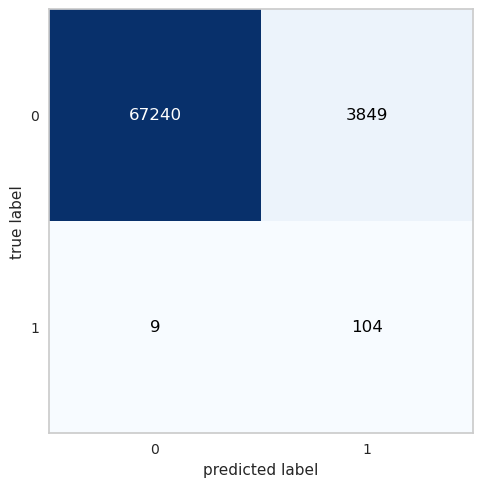

In [40]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(con)

In [41]:
y_pred = lg.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     71089
           1       0.03      0.92      0.05       113

    accuracy                           0.95     71202
   macro avg       0.51      0.93      0.51     71202
weighted avg       1.00      0.95      0.97     71202



In [42]:
y_pred = xgb.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     71089
           1       0.04      0.94      0.07       113

    accuracy                           0.96     71202
   macro avg       0.52      0.95      0.53     71202
weighted avg       1.00      0.96      0.98     71202



In [43]:
y_pred = tuned_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.99      0.92      0.95       113

    accuracy                           1.00     71202
   macro avg       1.00      0.96      0.98     71202
weighted avg       1.00      1.00      1.00     71202



## Cross validations

In [44]:
from sklearn.model_selection import KFold , cross_val_score

In [45]:
K_fold = KFold(n_splits= 3 , shuffle  = True ,random_state= 42)
scoring = "accuracy"
score = cross_val_score(xgb , x,y , cv = K_fold , scoring= scoring)
print (score)

[0.99956813 0.99942066 0.99948386]


In [46]:
round(np.mean(score)*100 , 2)

99.95

## Grid search

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
pram_grid = {"max_depth": [2,3,4] , 'max_features': [3,4,5] }
pram_grid

{'max_depth': [2, 3, 4], 'max_features': [3, 4, 5]}

In [50]:
clf = DecisionTreeClassifier()
grid = GridSearchCV(estimator= clf , param_grid= pram_grid , cv = 5 )
grid_result = grid.fit(x_train , y_train)

grid_result

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              random_state=None,
                                              splitter='best'),
             n_jobs=None,
             param_grid={'max_depth': [2, 3, 4], 'max_features': [3, 4, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [51]:
print ("Best: %f using %s" %(grid_result.best_score_ , grid_result.best_params_))

Best: 0.999302 using {'max_depth': 4, 'max_features': 5}


In [52]:
model = grid_result.best_estimator_
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

In [53]:
model.predict(x_test)

array([1, 0, 0, ..., 0, 0, 0])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.80      0.73      0.76       113

    accuracy                           1.00     71202
   macro avg       0.90      0.86      0.88     71202
weighted avg       1.00      1.00      1.00     71202



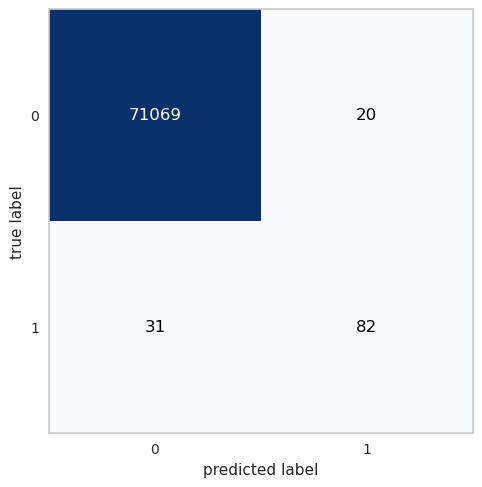

In [54]:
con = confusion_matrix(y_test , model.predict(x_test) )
con
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(con )

print (classification_report(y_test , model.predict(x_test)))

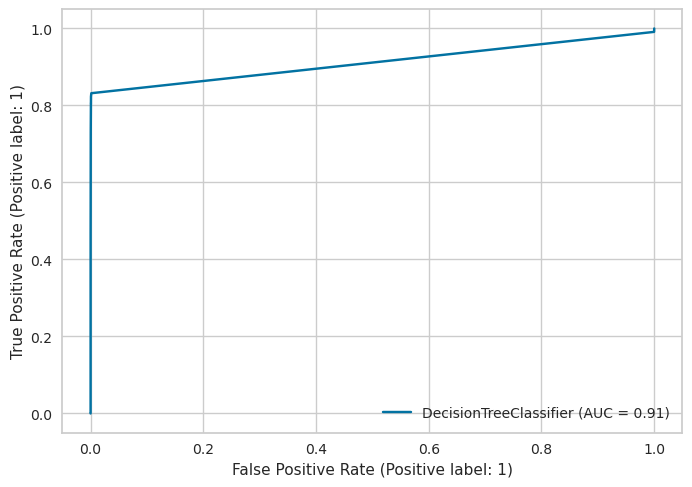

In [55]:
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(model, x_test, y_test)

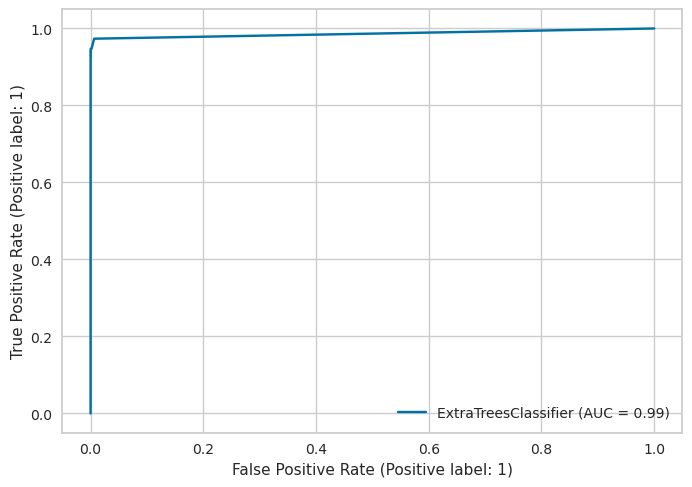

In [56]:
tuned_model_disp = RocCurveDisplay.from_estimator(tuned_model, x_test, y_test)

***
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#231855;
           font-size:20px;
           font-family:Nexa;
           letter-spacing:0.5px">
        <p style="padding: 10px;
              color:white;">
            <b>Thanks For Reading</b>
        </p>
</div>